In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
taxa_vazao = ctrl.Antecedent(np.arange(10, 101, 1), 'taxa_vazao')

In [3]:
minibatching = ctrl.Consequent(np.arange(0, 2050, 50), 'minibatching')

In [4]:
taxa_vazao.automf(number=5, names=['super_baixo', 'baixo', 'medio', 'alto', 'super_alto'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


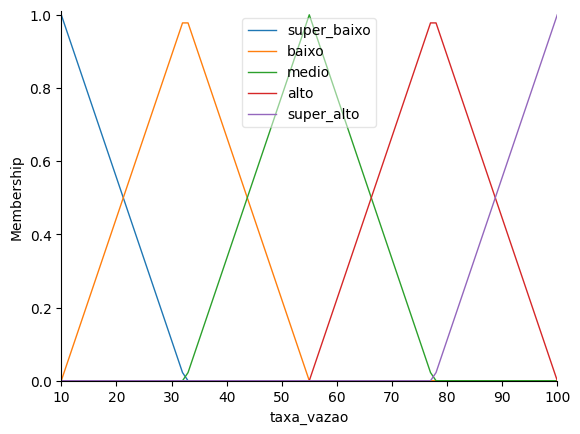

In [5]:
taxa_vazao.view()

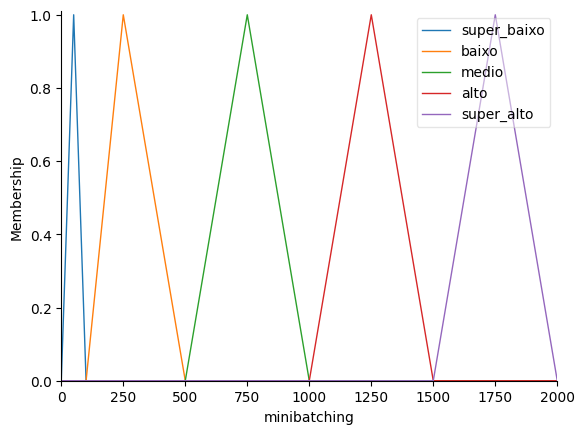

In [6]:
minibatching['super_baixo'] = fuzz.trimf(minibatching.universe, [0, 50, 100])
minibatching['baixo'] = fuzz.trimf(minibatching.universe, [100, 250, 500])
minibatching['medio'] = fuzz.trimf(minibatching.universe, [500, 750, 1000])
minibatching['alto'] = fuzz.trimf(minibatching.universe, [1000, 1250, 1500])
minibatching['super_alto'] = fuzz.trimf(minibatching.universe, [1500, 1750, 2000])

minibatching.view()

In [7]:
regra1 = ctrl.Rule(taxa_vazao['super_baixo'], minibatching['super_baixo'])
regra2 = ctrl.Rule(taxa_vazao['baixo'], minibatching['baixo'])
regra3 = ctrl.Rule(taxa_vazao['medio'], minibatching['medio'])
regra4 = ctrl.Rule(taxa_vazao['alto'], minibatching['alto'])
regra5 = ctrl.Rule(taxa_vazao['super_alto'], minibatching['super_alto'])


In [8]:
recomendacao_minibatching = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])

In [9]:
recomendacao = ctrl.ControlSystemSimulation(recomendacao_minibatching)

In [10]:
recomendacao.input['taxa_vazao'] = 44.30

recomendacao.compute()

552.658867666443


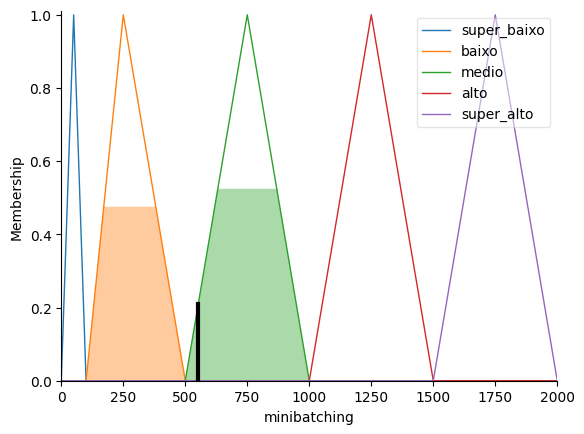

In [11]:
print(recomendacao.output['minibatching'])
minibatching.view(sim = recomendacao)